In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
rawdata = pd.read_csv("C:/Users/Dell/Desktop/Neuron labs/dataset4/raw_data.csv")
print(rawdata)

      iso_code     location        date  total_cases  total_deaths  \
0          AFG  Afghanistan  2019-12-31          0.0           0.0   
1          AFG  Afghanistan  2020-01-01          0.0           0.0   
2          AFG  Afghanistan  2020-01-02          0.0           0.0   
3          AFG  Afghanistan  2020-01-03          0.0           0.0   
4          AFG  Afghanistan  2020-01-04          0.0           0.0   
...        ...          ...         ...          ...           ...   
50413      ZWE     Zimbabwe  2020-10-15       8055.0         231.0   
50414      ZWE     Zimbabwe  2020-10-16       8075.0         231.0   
50415      ZWE     Zimbabwe  2020-10-17       8099.0         231.0   
50416      ZWE     Zimbabwe  2020-10-18       8110.0         231.0   
50417      ZWE     Zimbabwe  2020-10-19       8147.0         231.0   

       stringency_index  population  gdp_per_capita  human_development_index  \
0                  0.00    38928341        1803.987                    0.498   

In [3]:
transformdata = pd.read_csv("C:/Users/Dell/Desktop/Neuron labs/dataset4/transformed_data.csv")
print(transformdata)

      CODE      COUNTRY        DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan  2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan  2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan  2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan  2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan  2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...         ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe  2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe  2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe  2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe  2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe  2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  
0      17.477233  7.497754  
1      17.477233  7.497754  


In [9]:
print("location\t    no.of times ")
rawdata["location"].value_counts()

location	    no.of times 


Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: location, Length: 210, dtype: int64

In [10]:
rawdata["location"].value_counts().mode()

0    294
Name: location, dtype: int64

In [15]:
code = rawdata["iso_code"].unique().tolist()
country = rawdata["location"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = rawdata["population"].unique().tolist()
gdp = []

for i in country:
    hdi.append((rawdata.loc[rawdata["location"] == i, "human_development_index"]).sum()/294)
    tc.append((transformdata.loc[transformdata["COUNTRY"] == i, "TC"]).sum())
    td.append((transformdata.loc[transformdata["COUNTRY"] == i, "TD"]).sum())
    sti.append((rawdata.loc[rawdata["location"] == i, "stringency_index"]).sum()/294)
    population.append((transformdata.loc[transformdata["COUNTRY"] == i, "POP"]).sum()/294)

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), 
                               columns = ["Country Code", "Country", "Human Development Index", 
                                          "Total Cases", "Total Deaths", 
                                          "Stringency Index", "Population"])
print(aggregated_data.head())

  Country Code      Country  Human Development Index  Total Cases  \
0          AFG  Afghanistan                 0.498000  2000.646094   
1          ALB      Albania                 0.600765  1702.240756   
2          DZA      Algeria                 0.754000  2052.510847   
3          AND      Andorra                 0.659551  1465.828250   
4          AGO       Angola                 0.418952  1203.978763   

   Total Deaths  Stringency Index  Population  
0   1226.948181         46.800034    38928341  
1    929.368800         48.625782     2877800  
2   1406.216387         55.053231    43851043  
3    786.655112         31.290510       77265  
4    590.138675         53.217925    32866268  


In [16]:
rawdata = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
print(rawdata.head())

    Country Code        Country  Human Development Index  Total Cases  \
200          USA  United States                 0.924000  3343.050755   
41           CHN          China                 0.752000  3128.587021   
27           BRA         Brazil                 0.759000  2913.256895   
97           ITA          Italy                 0.880000  2873.314489   
178          ESP          Spain                 0.887969  2843.820343   

     Total Deaths  Stringency Index  Population  
200   2480.576064         51.031497   331002647  
41    2205.740166         66.573265  1439323774  
27    2166.965888         50.903469   212559409  
97    2327.710204         53.546871    60461828  
178   2197.919025         49.858163    46754783  


In [17]:
rawdata = rawdata.head(10)
print(rawdata)

    Country Code         Country  Human Development Index  Total Cases  \
200          USA   United States                 0.924000  3343.050755   
41           CHN           China                 0.752000  3128.587021   
27           BRA          Brazil                 0.759000  2913.256895   
97           ITA           Italy                 0.880000  2873.314489   
178          ESP           Spain                 0.887969  2843.820343   
90           IND           India                 0.640000  2825.623737   
199          GBR  United Kingdom                 0.922000  2809.857646   
73           DEU         Germany                 0.936000  2804.510066   
92           IRN            Iran                 0.798000  2803.718251   
68           FRA          France                 0.901000  2801.434702   

     Total Deaths  Stringency Index  Population  
200   2480.576064         51.031497   331002647  
41    2205.740166         66.573265  1439323774  
27    2166.965888         50.903469

In [18]:
rawdata["GDP Before Covid"] = [65279.53, 8897.49, 2100.75, 
                            11497.65, 7027.61, 9946.03, 
                            29564.74, 6001.40, 6424.98, 42354.41]
rawdata["GDP During Covid"] = [63543.58, 6796.84, 1900.71, 
                            10126.72, 6126.87, 8346.70, 
                            27057.16, 5090.72, 5332.77, 40284.64]
print(rawdata)

    Country Code         Country  Human Development Index  Total Cases  \
200          USA   United States                 0.924000  3343.050755   
41           CHN           China                 0.752000  3128.587021   
27           BRA          Brazil                 0.759000  2913.256895   
97           ITA           Italy                 0.880000  2873.314489   
178          ESP           Spain                 0.887969  2843.820343   
90           IND           India                 0.640000  2825.623737   
199          GBR  United Kingdom                 0.922000  2809.857646   
73           DEU         Germany                 0.936000  2804.510066   
92           IRN            Iran                 0.798000  2803.718251   
68           FRA          France                 0.901000  2801.434702   

     Total Deaths  Stringency Index  Population  GDP Before Covid  \
200   2480.576064         51.031497   331002647          65279.53   
41    2205.740166         66.573265  1439323774

# Analyzing Covid-19 Spread

In [24]:
#finding the percentage of cases and deaths 
cases_per = rawdata['Total Cases'].head().sum()
deaths_per = rawdata['Total Deaths'].head().sum()
print("The Percentage of the cases : ",cases_per)
print("The Percentage of the deaths: ",deaths_per)

The Percentage of the cases :  15102.029503242
The Percentage of the deaths:  11378.911348064998


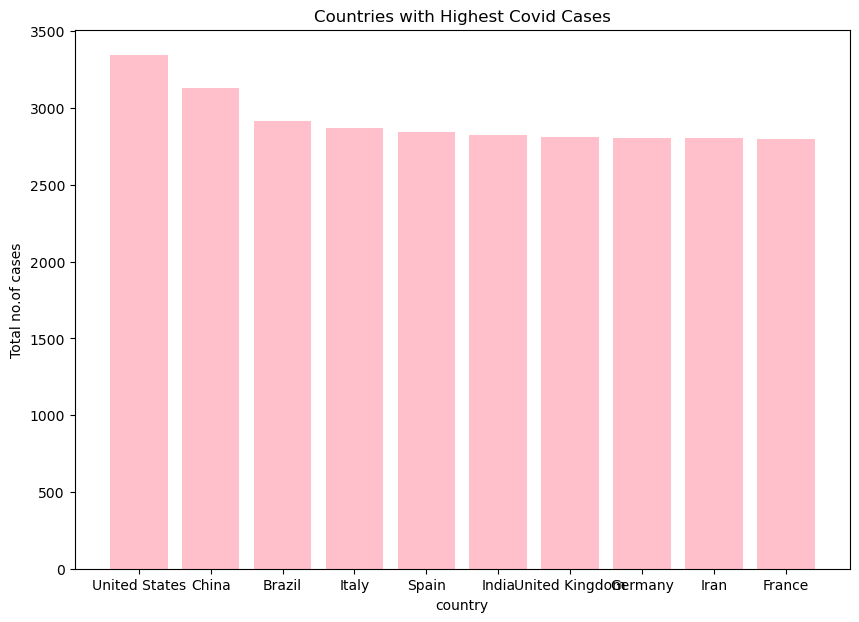

In [30]:
#Country with highest cases
fig = plt.figure(figsize =(10, 7))
x = rawdata["Country"].head(10)
y = rawdata["Total Cases"].head(10)
plt.xlabel("country")
plt.ylabel("Total no.of cases")
plt.title("Countries with Highest Covid Cases")
plt.bar(x,y,color='pink')
plt.show()

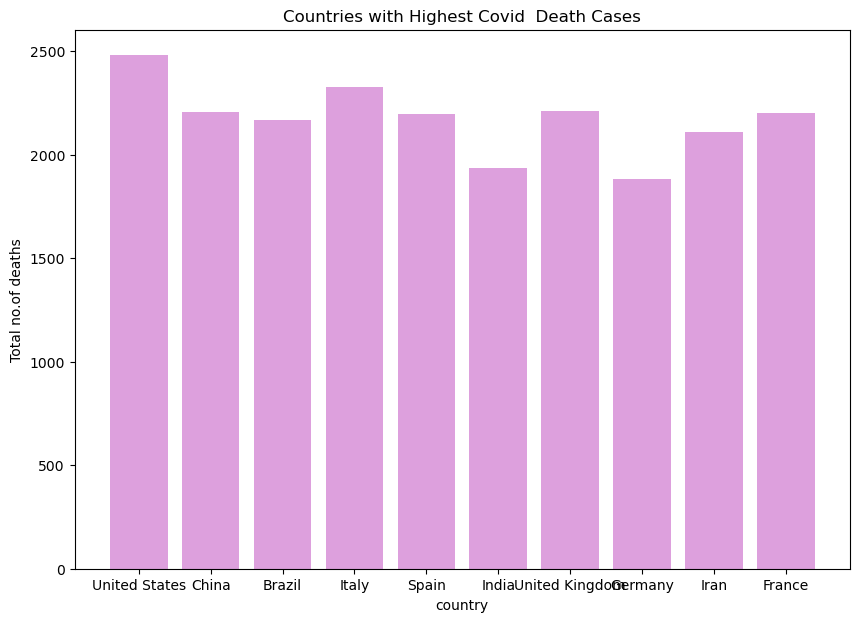

In [32]:
#Country with highest death cases 
fig = plt.figure(figsize =(10, 7))
x = rawdata['Country'].head(10)
y = rawdata['Total Deaths'].head(10)
plt.xlabel("country")
plt.ylabel("Total no.of deaths")
plt.title("Countries with Highest Covid  Death Cases")
plt.bar(x,y,color='plum')
plt.show()

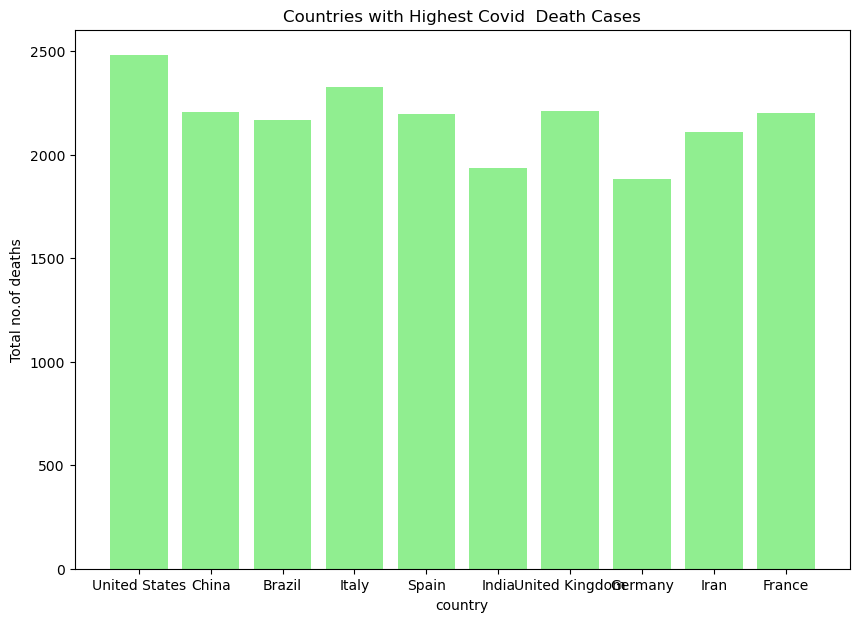

In [34]:
#Country with highest death cases
fig = plt.figure(figsize =(10, 7))
x = rawdata['Country'].head(10)
y = rawdata['Total Deaths'].head(10)
plt.xlabel("country")
plt.ylabel("Total no.of deaths")
plt.title("Countries with Highest Covid  Death Cases")
plt.bar(x,y,color='lightgreen')
plt.show()

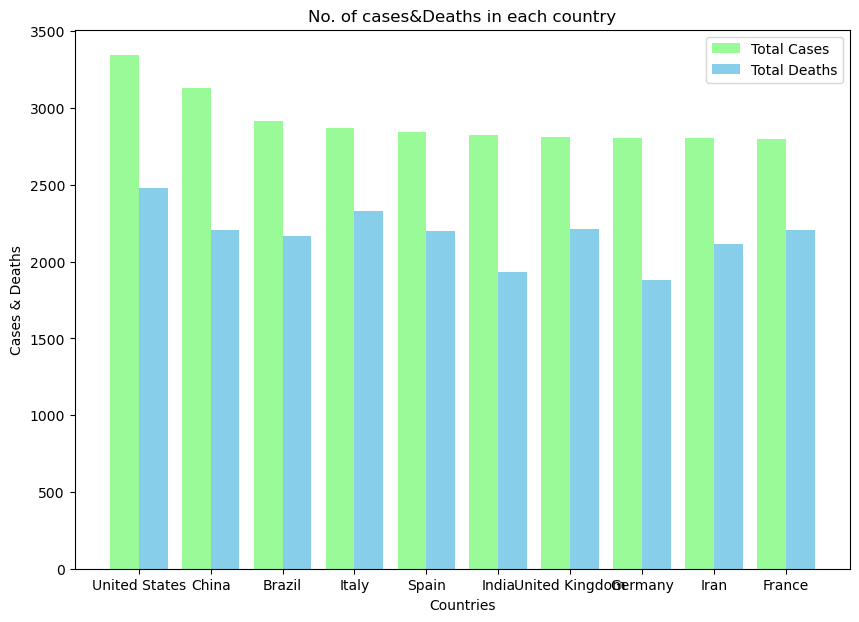

In [36]:
#The total no. of deaths & Cases occured per each country

fig = plt.figure(figsize =(10, 7))
# x is countries
x = rawdata['Country'].head(10)
# y is no.of cases
y = rawdata['Total Cases'].head(10)
# z is no.of Deaths
z = rawdata['Total Deaths'].head(10)
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, y,0.4,label = 'Total Cases',color = 'palegreen')
plt.bar(x_axis + 0.2, z,0.4,label = 'Total Deaths',color = 'skyblue')
  
plt.xticks(x_axis, x)
plt.xlabel("Countries")
plt.ylabel("Cases & Deaths")
plt.title("No. of cases&Deaths in each country")
plt.legend()
plt.show()

# Analyzing Economy Affected by Covid-19

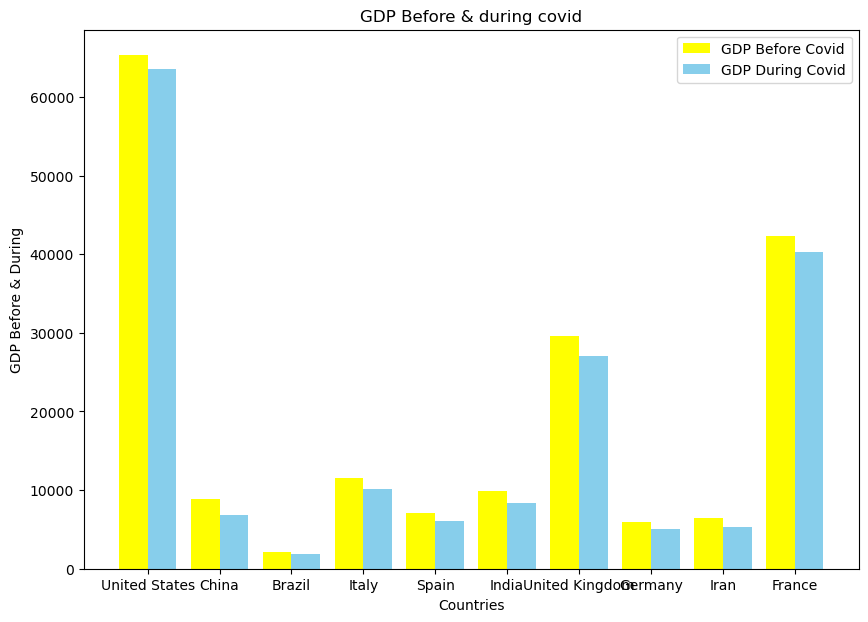

In [40]:
#The total over look of the GDP before & during the covid
fig = plt.figure(figsize =(10, 7))
x = rawdata['Country'].head(10)
y = rawdata['GDP Before Covid'].head(10)
z = rawdata['GDP During Covid'].head(10)
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, y,0.4,label = 'GDP Before Covid',color = 'yellow')
plt.bar(x_axis + 0.2, z,0.4,label = 'GDP During Covid',color = 'skyblue')
  
plt.xticks(x_axis, x)
plt.xlabel("Countries")
plt.ylabel("GDP Before & During")
plt.title("GDP Before & during covid")
plt.legend()
plt.show()